# Telecom Churn Prediction

# 0. Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

# 1. Objective:

The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:

1. It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

2. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

3. Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.

4. Recommend strategies to manage customer churn based on your observations.

### 1. Data Loading, Cleaning and Understadning

Lets start by loading our dependencies. We can keep adding any imports to this cell block, as we write mode and mode code.

In [1]:
#Data Structures
import pandas as pd
import numpy as np 
#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score
!pip install xgboost
!pip install -U imbalanced-learn
import xgboost as xgb  # Load this xgboost
#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#Removing display limit of dataframe (optional cell to run)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Setting style for seaonrn
sns.color_palette("seismic", 50)
sns.set_style("whitegrid", {'axes.grid' : False})

Next, we load our datasets and the data dictionary file.

The **train.csv** file contains both dependent and independent features, while the **test.csv** contains only the independent variables. 

So, for model selection, I will create our own train/test dataset from the **train.csv** and use the model to predict the solution using the features in unseen test.csv data for submission.

In [3]:
#Loading the data
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")
#data = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c55/train.csv")
#test = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c55/test.csv")
#sample = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c55/sample.csv")
#data_dict = pd.read_csv("/kaggle/input/telecom-churn-case-study-hackathon-c55/data_dictionary.csv")

print(data.shape)
print(test.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [4]:
data.info(verbose=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [5]:
data_cat = data.select_dtypes(include='object')
data_cat

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014
...,...,...,...,...,...,...,...,...,...
69994,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/31/2014,8/31/2014,NaN,7/31/2014,8/21/2014
69995,6/30/2014,7/31/2014,8/31/2014,6/28/2014,7/31/2014,8/27/2014,NaN,NaN,NaN
69996,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/30/2014,8/29/2014,NaN,NaN,NaN
69997,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/19/2014,8/26/2014,6/17/2014,7/13/2014,8/14/2014


In [6]:
test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [7]:
# we can see that 9 columns we have as a string which is date and will be converted to datetype 

In [8]:
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [9]:
# Checking Classes Distribution
data['churn_probability'].value_counts()/data.shape[0]*100

0    89.811283
1    10.188717
Name: churn_probability, dtype: float64

In [10]:
# To have a view on data dict
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [11]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [12]:
data.tail()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
69994,69994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,15.760,410.924,329.136,0.00,7.36,10.93,0.00,488.46,381.64,14.96,0.0,0.0,0.00,0.0,0.0,0.00,2.44,7.19,0.00,60.64,89.66,0.00,0.00,0.00,0.0,2.43,0.86,0.00,63.09,96.86,0.00,4.91,3.73,0.00,414.61,290.14,0.0,0.0,0.0,0.0,0.0,0.0,0.00,419.53,293.88,0.00,0.0,0.0,0.00,14.05,1.83,0.0,0.0,0.0,0.00,496.68,392.58,0.00,26.59,33.84,0.00,172.33,223.91,0.00,1.06,0.00,0.00,199.99,257.76,0.00,0.00,0.00,0.00,21.99,11.79,0.0,0.0,0.00,0.0,0.0,0.0,0.00,21.99,11.79,0.00,221.99,269.56,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,1,17,13,50,397,512,50,110,130,6/18/2014,7/31/2014,8/31/2014,50,20,130,NaN,7/31/2014,8/21/2014,NaN,7.0,1.0,NaN,25.0,17.0,NaN,6.0,1.0,NaN,1.0,0.0,NaN,135.0,17.0,0.00,244.59,144.31,0.00,0.00,0.00,NaN,21.91,0.00,NaN,60.61,48.00,NaN,0.0,0.0,0,0,0,0,6,1,0,0,0,0,1,0,NaN,1.0,1.0,221,0.00,0.00,0.00,0
69995,69995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,160.083,289.129,265.772,116.54,196.46,232.63,49.53,96.28,48.06,0.00,0.0,0.0,0.00,0.0,0.0,7.18,30.11,9.06,37.53,73.84,47.34,2.01,0.00,0.00,0.0,4.01,0.00,46.73,103.96,56.41,109.36,166.34,223.56,9.98,18.41,0.53,0.0,0.0,0.0,0.0,0.0,0.0,119.34,184.76,224.09,0.00,0.0,0.0,0.13,4.01,0.18,0.0,0.0,0.0,166.21,292.74,280.69,30.48,28.48,23.09,21.78,35.18,28.79,2.38,0.21,0.00,54.64,63.88,51.89,16.63,39.23,66.28,8.96,9.31,17.24,0.0,0.0,0.00,0.0,0.0,0.0,25.59,48.54,83.53,80.24,112.43,136.01,0.0,0.0,0.5,0.00,0.0,0.00,0.00,0.00,0.08,5,11,9,200,31

In [13]:
# From above analysis we can see that there is no summary rows i.e headers or footers presents.

In [14]:
# Lets check if there is duplicate rows
data['id'].nunique()


69999

In [15]:
# lets drop id column
data.drop(['id'], axis=1, inplace=True)

In [16]:
# From above analysis we can see that there is no duplicates rows present

In [17]:
#checking the unique columns
unique_columns = [col for col in data.columns if data[col].nunique() ==len(data)]
unique_columns

[]

In [18]:
# lets check if a columns is having a single value 
data.nunique().sort_values()

circle_id               1
std_ic_t2o_mou_8        1
std_ic_t2o_mou_7        1
std_og_t2c_mou_8        1
std_og_t2c_mou_7        1
                    ...  
total_og_mou_6      33135
total_og_mou_7      33195
arpu_8              60194
arpu_7              61425
arpu_6              61615
Length: 171, dtype: int64

In [19]:
# Lets drop these as it will not contrubute to model building
single_valued_cols = [col for col in data.columns if data[col].nunique() ==1]
len(single_valued_cols)

13

In [20]:
data.drop(single_valued_cols, axis=1,inplace=True)

In [21]:
# Lets tests if single values is present
single_valued_cols = [col for col in data.columns if data[col].nunique() ==1]
len(single_valued_cols)

0

In [22]:
# Lets check the unique columns value
data.nunique().sort_values()


churn_probability        2
night_pck_user_8         2
night_pck_user_7         2
night_pck_user_6         2
fb_user_7                2
                     ...  
total_og_mou_6       33135
total_og_mou_7       33195
arpu_8               60194
arpu_7               61425
arpu_6               61615
Length: 158, dtype: int64

In [23]:
# Lets check for missing values
(data.isnull().sum()/len(data)).sort_values(ascending=False)

av_rech_amt_data_6    0.749025
count_rech_3g_6       0.749025
arpu_3g_6             0.749025
arpu_2g_6             0.749025
max_rech_data_6       0.749025
                        ...   
vol_2g_mb_6           0.000000
vol_2g_mb_7           0.000000
vol_2g_mb_8           0.000000
vol_3g_mb_6           0.000000
churn_probability     0.000000
Length: 158, dtype: float64

In [24]:
missing_data_percent = 100*data.isnull().sum()/len(data)
missing_data_percent

arpu_6               0.000000
arpu_7               0.000000
arpu_8               0.000000
onnet_mou_6          3.954342
onnet_mou_7          3.838626
                       ...   
aon                  0.000000
aug_vbc_3g           0.000000
jul_vbc_3g           0.000000
jun_vbc_3g           0.000000
churn_probability    0.000000
Length: 158, dtype: float64

In [25]:
# checking the missing value
(data.isnull().sum()/len(data)).sort_values(ascending=False)

av_rech_amt_data_6    0.749025
count_rech_3g_6       0.749025
arpu_3g_6             0.749025
arpu_2g_6             0.749025
max_rech_data_6       0.749025
                        ...   
vol_2g_mb_6           0.000000
vol_2g_mb_7           0.000000
vol_2g_mb_8           0.000000
vol_3g_mb_6           0.000000
churn_probability     0.000000
Length: 158, dtype: float64

In [26]:
missing_cols = missing_data_percent[missing_data_percent.ge(50)].index
len(missing_cols)

30

In [27]:
# we can see that there are many fields which is having many null values. 
# will drop if a colums is having more than 40 % of rows are null.

In [28]:
# From above analysis we can see that we have more 30 such fields which is having more 40 % of data as null
# Lets drop those them
data.drop(missing_cols, axis=1, inplace=True)
data.shape

(69999, 128)

In [29]:
# Removing rows with missing values with more than 10 missing values
data.dropna(axis=0,inplace=True,thresh=data.shape[1]-10)
# Shape of the dataframe after removing rows
print(data.shape)
# cehcking the misssing value again
(data.isnull().sum()/len(data)).sort_values(ascending=False)

(63842, 128)


date_of_last_rech_8    0.016807
date_of_last_rech_6    0.008035
date_of_last_rech_7    0.007190
arpu_6                 0.000000
spl_ic_mou_6           0.000000
                         ...   
std_og_t2f_mou_7       0.000000
std_og_t2f_mou_6       0.000000
std_og_t2m_mou_8       0.000000
std_og_t2m_mou_7       0.000000
churn_probability      0.000000
Length: 128, dtype: float64

In [30]:
data_cat = data.select_dtypes(include='object')
data_cat

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,6/22/2014,7/10/2014,8/24/2014
1,6/12/2014,7/10/2014,8/26/2014
2,6/11/2014,7/22/2014,8/24/2014
3,6/15/2014,7/21/2014,8/25/2014
4,6/25/2014,7/26/2014,8/30/2014
...,...,...,...
69994,6/18/2014,7/31/2014,8/31/2014
69995,6/28/2014,7/31/2014,8/27/2014
69996,6/25/2014,7/30/2014,8/29/2014
69997,6/29/2014,7/19/2014,8/26/2014


In [31]:
# List of columns with Date datatype
date_cols = [k for k in data.columns.to_list() if 'date' in k]
date_cols

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [32]:
(data.isna().sum()/len(data)).sort_values(ascending=False)

date_of_last_rech_8    0.016807
date_of_last_rech_6    0.008035
date_of_last_rech_7    0.007190
arpu_6                 0.000000
spl_ic_mou_6           0.000000
                         ...   
std_og_t2f_mou_7       0.000000
std_og_t2f_mou_6       0.000000
std_og_t2m_mou_8       0.000000
std_og_t2m_mou_7       0.000000
churn_probability      0.000000
Length: 128, dtype: float64

In [33]:
data.shape

(63842, 128)

In [34]:
 #Lets Convert the  Date columns to datetime datatype and extracting the days before last day
for i in date_cols:
    data[i] = pd.to_datetime(data[i])
    data[i] = data[i].dt.date
    data[i] = pd.to_datetime(data[i])
    data[i] = data[i].dt.daysinmonth - data[i].dt.day
    
 #for test data
for i in date_cols:
    test[i] = pd.to_datetime(data[i])
    test[i] = test[i].dt.date
    test[i] = pd.to_datetime(data[i])
    test[i] = test[i].dt.daysinmonth - test[i].dt.day

### 2. Outlier Treamemment

In [35]:
# Checkign if outliers are there.
# oputliers detections
outliers_percentage={}
for col in data.columns:
    IQR=data[col].quantile(.75)-data[col].quantile(.25)
    outliers_count=data[(data[col]>(data[col].quantile(.75)+1.5*IQR)) | (data[col]<(data[col].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[col]=round(outliers_count/data.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

# for test data


,Features,Percentage
107,vol_2g_mb_8,23.72
87,ic_others_6,23.39
106,vol_2g_mb_7,23.30
89,ic_others_8,23.19
105,vol_2g_mb_6,22.69
...,...,...
104,last_day_rch_amt_8,1.74
99,date_of_last_rech_6,1.64
50,og_others_8,0.45
49,og_others_7,0.36


In [36]:
# Majority of the numeric columns have outliers
# We will not drop outilers as it can  cause loss of information.
# Hence reassigning fixed minimum and maximum values to those rows where feature value is outside the range of [25th percentile - 1.5 * IQR, 75th percentile + 1.5 * IQR]
#IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.
# Target column 'churn_probability' is excluded in this

In [37]:
# Remove Outliers
for col,percentage in outliers_percentage.items():
    if col!='churn_probability':
        IQR = data[col].quantile(.75) - data[col].quantile(.25) 
        max_value = data[col].quantile(.75)+1.5*IQR
        min_value = data[col].quantile(.25)-1.5*IQR
        data[col][data[col] > max_value] = max_value
        data[col][data[col] < min_value ] = min_value

In [38]:
# Checkign if outliers are there.
outliers_percentage={}

for col in data.columns:
    IQR=data[col].quantile(.75)-data[col].quantile(.25)
    outliers_count=data[(data[col]>(data[col].quantile(.75)+1.5*IQR)) | (data[col]<(data[col].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[col]=round(outliers_count/data.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
127,churn_probability,5.94
1,arpu_7,0.00
94,total_rech_amt_7,0.00
93,total_rech_amt_6,0.00
92,total_rech_num_8,0.00
...,...,...
37,std_og_t2f_mou_7,0.00
36,std_og_t2f_mou_6,0.00
35,std_og_t2m_mou_8,0.00
34,std_og_t2m_mou_7,0.00


In [39]:
# hence we outler has been removed

In [40]:
print("Feature : Percentage of Missing Value")
print("=====================================")
missing_val_cols=[]
for col in data.columns:
    if data[col].isnull().any():
        print(col, '%:', round(data[col].isnull().sum()/data.shape[0], 2)*100)
        missing_val_cols.append(col)
missing_val_cols

Feature : Percentage of Missing Value
date_of_last_rech_6 %: 1.0
date_of_last_rech_7 %: 1.0
date_of_last_rech_8 %: 2.0


['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [41]:
# Since percentage of null value is very less. we can drop them.
data = data.dropna(subset=['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=0)


In [42]:
print("Feature : Percentage of Missing Value")
print("=====================================")
missing_val_cols=[]
for col in data.columns:
    if data[col].isnull().any():
        print(col, ':', round(data[col].isnull().sum()/data.shape[0], 2)*100)
        missing_val_cols.append(col)
missing_val_cols

Feature : Percentage of Missing Value


[]

In [43]:
# we can see that data is clean now.

### 3. Feature Engineering

In [44]:
data.info(verbose=1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 61895 entries, 0 to 69998
Data columns (total 128 columns):
 #    Column               Dtype  
---   ------               -----  
 0    arpu_6               float64
 1    arpu_7               float64
 2    arpu_8               float64
 3    onnet_mou_6          float64
 4    onnet_mou_7          float64
 5    onnet_mou_8          float64
 6    offnet_mou_6         float64
 7    offnet_mou_7         float64
 8    offnet_mou_8         float64
 9    roam_ic_mou_6        float64
 10   roam_ic_mou_7        float64
 11   roam_ic_mou_8        float64
 12   roam_og_mou_6        float64
 13   roam_og_mou_7        float64
 14   roam_og_mou_8        float64
 15   loc_og_t2t_mou_6     float64
 16   loc_og_t2t_mou_7     float64
 17   loc_og_t2t_mou_8     float64
 18   loc_og_t2m_mou_6     float64
 19   loc_og_t2m_mou_7     float64
 20   loc_og_t2m_mou_8     float64
 21   loc_og_t2f_mou_6     float64
 22   loc_og_t2f_mou_7     float64
 23   loc_og_t2

In [45]:
# so, now all the data are in numeric format

##### Derived features

In [46]:
# we can see that data is clean now.

In [47]:
# Average recharge amount for June and July
data['avg_rech_amt_6_7']=((data['total_rech_amt_6']+data['total_rech_amt_7'])/2)

# Days user with company
data['days_stayed'] = data['date_of_last_rech_8'] - data['date_of_last_rech_6']

# Average 3g usage for June and July
data['avg_3g_6_7']=((data['vol_3g_mb_6']+data['vol_3g_mb_7'])/2)

# Average 2g usage for June and July
data['avg_2g_6_7']=((data['vol_2g_mb_6']+data['vol_2g_mb_7'])/2)


# Avergae of 6th and 7th month total usage
data['avg_total_6_7']=((data['total_og_mou_6']+data['total_og_mou_7'])/2)

# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_og_mou_8'] + data['total_ic_mou_7'] + data['total_ic_mou_8'])/2
# ARUP in action phase
data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8'])/2
# Difference of good and action phase ARPU
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']
# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

## For test dat

# Average recharge amount for June and July
test['avg_rech_amt_6_7']=((test['total_rech_amt_6']+test['total_rech_amt_7'])/2)

# Days user with company
test['days_stayed'] = test['date_of_last_rech_8'] - test['date_of_last_rech_6']

# Average 3g usage for June and July
test['avg_3g_6_7']=((test['vol_3g_mb_6']+test['vol_3g_mb_7'])/2)

# Average 2g usage for June and July
test['avg_2g_6_7']=((test['vol_2g_mb_6']+test['vol_2g_mb_7'])/2)


# Avergae of 6th and 7th month total usage
test['avg_total_6_7']=((test['total_og_mou_6']+test['total_og_mou_7'])/2)

# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
test['avg_mou_action'] = (test['total_og_mou_7'] + test['total_og_mou_8'] + test['total_ic_mou_7'] + test['total_ic_mou_8'])/2
# ARUP in action phase
test['avg_arpu_action'] = (test['arpu_7'] + test['arpu_8'])/2
# Difference of good and action phase ARPU
test['diff_arpu'] = test['avg_arpu_action'] - test['arpu_6']
# Checking whether the arpu has decreased on the action month
test['decrease_arpu_action'] = np.where(test['diff_arpu'] < 0, 1, 0)


In [48]:
# Filtering the high customers based on average recharge amount
#perc_6_7=data['avg_rech_amt_6_7'].quantile(0.70)
#data=data[data['avg_rech_amt_6_7']>=perc_6_7]
#data.shape

In [49]:
(data.isna().sum()/len(data)).sort_values(ascending=False)

arpu_6                  0.0
total_rech_amt_7        0.0
ic_others_7             0.0
ic_others_8             0.0
total_rech_num_6        0.0
                       ... 
std_og_mou_7            0.0
std_og_mou_6            0.0
std_og_t2f_mou_8        0.0
std_og_t2f_mou_7        0.0
decrease_arpu_action    0.0
Length: 137, dtype: float64

### 4. Exploratory Data Analysis

In [50]:
# Converting churn column to int in order to do aggfunc in the pivot table
data['churn_probability'] = data['churn_probability'].astype('int64')

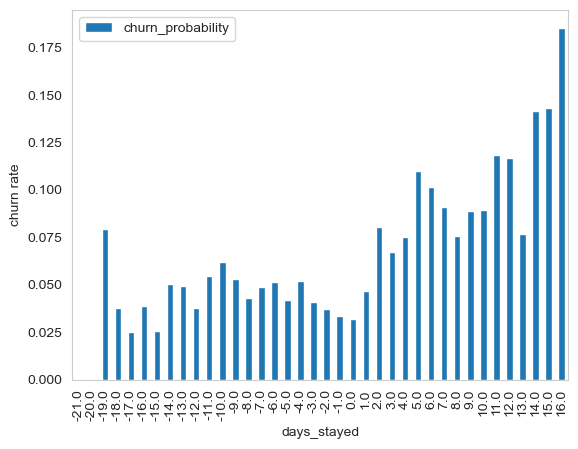

In [51]:
data.pivot_table(values='churn_probability', index='days_stayed', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

##### **Average rev per user**
Churn rate is more for the customer who stayed with company for longer time

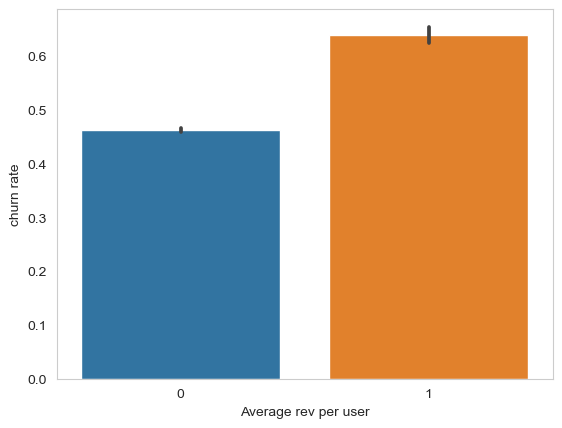

In [52]:
sns.barplot(x='churn_probability', y='decrease_arpu_action', data=data)
plt.xlabel('Average rev per user')
plt.ylabel('churn rate')
plt.show()

In [53]:
# Creating churn dataframe
data_churn = data[data['churn_probability'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['churn_probability'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

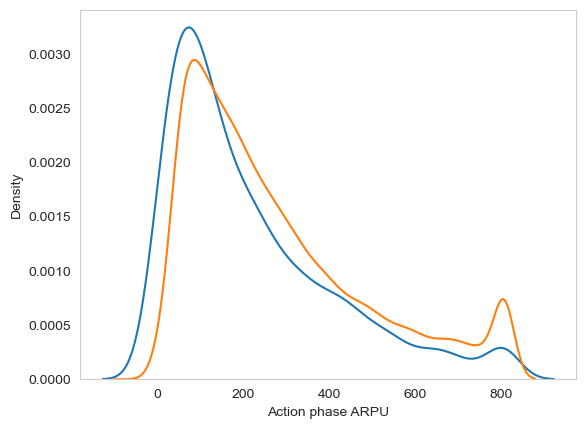

In [54]:
# Distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

###### **decrease_rech_amt_action**
This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [55]:
# Avg rech_amt in action phase
data['avg_rech_amt_action'] = (data['total_rech_amt_7'] + data['total_rech_amt_8'])/2
test['avg_rech_amt_action'] = (test['total_rech_amt_7'] + test['total_rech_amt_8'])/2

In [56]:
# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']
test['diff_rech_amt'] = test['avg_rech_amt_action'] - test['total_rech_amt_6']

In [57]:
# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0)
test['decrease_rech_amt_action'] = np.where((test['diff_rech_amt'] < 0), 1, 0)

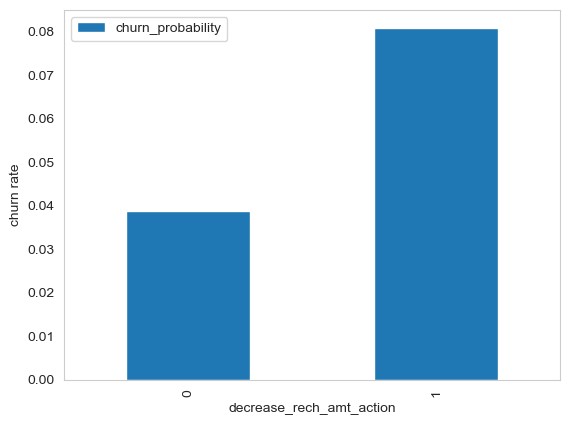

In [58]:
data.pivot_table(values='churn_probability', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

##### Analysis
The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase. which means the customer is planning to churn as we can see this from his recharge behaviour



##### Deriving new column decrease_mou_action
This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [59]:
# Total mou at good phase incoming and outgoing
data['total_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])
test['total_mou_good'] = (test['total_og_mou_6'] + test['total_ic_mou_6'])

In [60]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_og_mou_8'] + data['total_ic_mou_7'] + data['total_ic_mou_8'])/2
# Difference avg_mou_good and avg_mou_action
test['avg_mou_action'] = (test['total_og_mou_7'] + test['total_og_mou_8'] + test['total_ic_mou_7'] + test['total_ic_mou_8'])/2


In [61]:
# Difference avg_mou_good and avg_mou_action
data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']
test['diff_mou'] = test['avg_mou_action'] - test['total_mou_good']

In [62]:
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)
test['decrease_mou_action'] = np.where((test['diff_mou'] < 0), 1, 0)

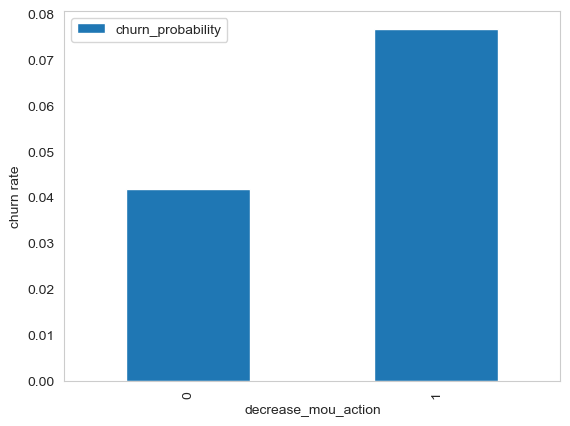

In [63]:
data.pivot_table(values='churn_probability', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

##### Analysis

We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.

In [64]:
data["High_valued_good"]=data['total_rech_amt_6']
test["High_valued_good"]=test['total_rech_amt_6']

data["High_valued_action"]=(data['total_rech_amt_7']+data['total_rech_amt_8'])/2
test["High_valued_action"]=(test['total_rech_amt_7']+test['total_rech_amt_8'])/2

quantile_70_good=data["High_valued_good"].quantile(0.7)
quantile_70_action=data["High_valued_action"].quantile(0.7)
print("quantile_70_good" , quantile_70_good)

quantile_70_good 395.0


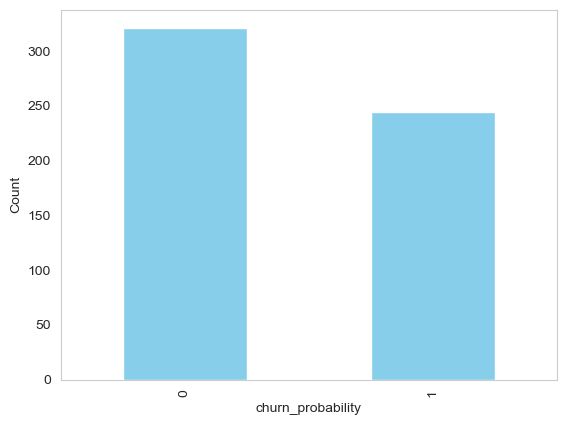

In [65]:
# Define bins and labels
bins = [0, 10, 20, 30]  # Define your own bin edges
labels = ['Low', 'Medium', 'High']  # Define labels for each bin

# Create a new column with the categorical variable
data['Category'] = pd.cut(data['High_valued_action'], bins=bins, labels=labels, include_lowest=True)

# Plot the bar chart of the categorical variable
#category_counts = data['Category'].sum().sort_index()
category_means = data.groupby('churn_probability')['High_valued_action'].mean()
category_means.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('churn_probability')
plt.ylabel('Count')
#plt.title('Categorical Plot of High_valued_Customers_action')

# Display the bar chart
plt.show()

###### In the action phase the high value customers are grouped in bins ,from the graph it is evident that the average high value customers are less likely to churn.

In [66]:
# Avg rech number at action phase
data['avg_rech_num_action'] = (data['total_rech_num_7'] + data['total_rech_num_8'])/2
test['avg_rech_num_action'] = (test['total_rech_num_7'] + test['total_rech_num_8'])/2

In [67]:
# Difference total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']
test['diff_rech_num'] = test['avg_rech_num_action'] - test['total_rech_num_6']

In [68]:
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)
test['decrease_rech_num_action'] = np.where((test['diff_rech_num'] < 0), 1, 0)

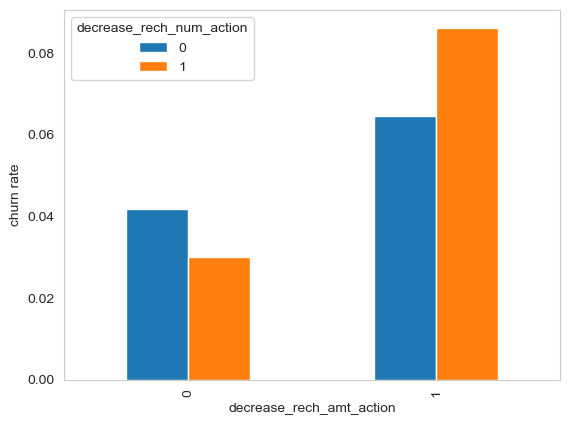

In [69]:
data.pivot_table(values='churn_probability', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

##### Analysis
We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

###### Bivariate analysis
Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase

### 5. Data Prepration for model building

In [70]:
data.select_dtypes(exclude='object')

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,days_stayed,avg_3g_6_7,avg_2g_6_7,avg_total_6_7,avg_mou_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,total_mou_good,diff_mou,decrease_mou_action,High_valued_good,High_valued_action,Category,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.0,0.0,0.0,0.0,0.0,0.0,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.000,0.000,0.0,0.0,0.0,7.53,16.04,2.61,46.34,77.95,1.01000,18.75,80.6100,0.0000,0.0,0.0,0.0,65.09,204.99000,1.01,0.0,0.0,0.0,5.90,0.630,0.00,0.0,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.000,0.000,3.2600,24.76,24.71,0.000,7.61000,0.210,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.180,11.84,53.04,40.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,2,77.0,65.0,10,65,65,10.0,8.0,16.0,7.0,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958.0,0.0,0.0,0.0,0,71.0,-1.0,0.0,0.0,151.445,159.455,47.2680,15.9910,0,37.5,-39.5,1,93.05,66.405,0,77.0,37.5,NaN,2.0,-1.0,1
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00000,0.00,0.0000,0.0000,0.0,0.0,0.0,0.00,0.00000,0.00,0.0,0.0,0.0,0.00,9.225,9.85,0.0,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.660,3.400,3.4400,39.44,25.03,0.000,0.00000,0.000,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.000,3.44,39.44,25.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4,5,0.0,145.0,50,0,145,50.0,18.0,16.0,5.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,710.0,0.0,0.0,0.0,0,72.5,-13.0,0.0,0.0,15.365,63.435,82.8700,82.8700,0,97.5,97.5,0,3.44,59.995,0,0.0,97.5,NaN,4.5,1.5,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.000,0.000,0.0,0.0,0.0,24.64,12.98,0.00,0.00,2.94,0.00000,28.94,82.0500,0.0000,0.0,0.0,0.0,28.94,84.99000,0.00,0.0,0.0,0.0,2.89,1.380,0.00,0.0,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.000,0.000,94.3800,31.34,30.01,10.125,0.00000,0.000,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.380,1

In [71]:
data.drop(['Category'], axis=1,inplace=True )

##### Scaling the feature

In [72]:
X = data.drop(['churn_probability'], axis=1)
y=data['churn_probability']

In [73]:
X_copy=X.copy() ## will use copy data for further analysis.
X_copy.shape

(61895, 147)

In [74]:
# feature Scaling 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [75]:
X_scaled = pd.DataFrame(data=ss.fit_transform(X), columns=X.columns)

In [76]:
X_scaled.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,days_stayed,avg_3g_6_7,avg_2g_6_7,avg_total_6_7,avg_mou_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,total_mou_good,diff_mou,decrease_mou_action,High_valued_good,High_valued_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
count,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,61895.0,61895.0,61895.0,61895.0,61895.0,61895.0,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,61895.0,61895.0,61895.0,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,61895.0,61895.0,61895.0,6.189500e+04,6.189500e+04,6.189500e+04,61895.0,61895.0,61895.0,6.189500e+04,6.189500e+04,6.189500e+04,61895.0,61895.0,61895.0,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,61895.0,61895.0,61895.0,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,61895.0,61895.0,61895.0,61895.0,61895.0,61895.0,61895.0,61895.0,61895.0,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,61895.0,61895.0,61895.0,61895.0,61895.0,61895.0,61895.0,61895.0,61895.0,61895.0,61895.0,61895.0,61895.0,61895.0,61895.0,61895.0,61895.0,61895.0,6.189500e+04,61895.0,61895.0,61895.0,6.189500e+04,6.189500e+04,61895.0,61895.0,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04,6.189500e+04
mean,-1.242115e-16,-3.834256e-17,-8.104745e-17,7.657032e-17,1.883837e-16,4.867439e-17,8.862412e-17,2.999100e-16,-5.969500e-18,0.0,0.0,0.0,0.0,0.0,0.0,-8.862412e-17,3.730938e-17,-1.14

In [77]:
# we can see that data has been transformed.
# we can start building the model

### 6.  Part One: Model Building


#####  Principle Component Analysis


In [78]:
# PCA
#pca = PCA(n_components=0.9)  # Retain 90% of the variance
pca = PCA(n_components=20)

pca_X=pca.fit_transform(X_scaled)


In [79]:
 #Convert the PCA results to a DataFrame if needed
columns = [f'PC{i+1}' for i in range(pca_X.shape[1])]

pca_X = pd.DataFrame(pca_X, columns=columns)
 #Check the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")
pca_X.head()

Explained Variance Ratio: [0.28809375 0.13410854 0.08748821 0.05539019 0.04769006 0.03336921
 0.02495133 0.02219626 0.02043209 0.01988915 0.01762515 0.01661246
 0.01562233 0.01354772 0.01039507 0.00996603 0.00919721 0.00871519
 0.00860421 0.00834747]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-5.477312,2.109031,-1.040653,1.290590,1.294056,1.034757,-0.654845,0.199836,1.656470,-0.609686,-0.107534,0.533183,1.441458,-1.220336,-1.336978,-0.060803,0.737416,-0.392967,0.017347,0.765836
1,-7.162526,0.638221,2.195263,-0.701236,0.096208,0.132083,-0.171159,-0.171164,-0.974367,0.406116,-1.566560,-0.706380,2.840648,-0.716970,-1.292058,-0.051714,1.003995,-0.741382,-0.607067,-0.281680
2,-6.110070,0.571621,-1.234513,1.029887,0.785849,-0.037900,-1.278962,-0.710960,-1.034361,0.787345,-2.067671,0.235526,0.949847,-1.034159,-0.000846,0.004726,-0.661764,0.155610,-0.717810,-0.204999
3,-4.539139,-0.050362,0.600367,-0.817883,0.761061,-0.534239,0.174118,-0.571254,-0.607228,0.805272,-2.066394,-0.895327,4.051514,-0.124470,0.310493,0.598093,0.139353,0.439431,0.200315,0.132024
4,-5.006985,-0.153446,-1.984606,-1.993786,-0.954506,-1.407373,1.663400,1.248871,-1.228543,-1.565474,0.427083,-0.650457,-0.207061,-1.167575,-0.269275,-1.730851,-0.954775,-0.530443,0.254778,-0.092090


##### Commulative Variance

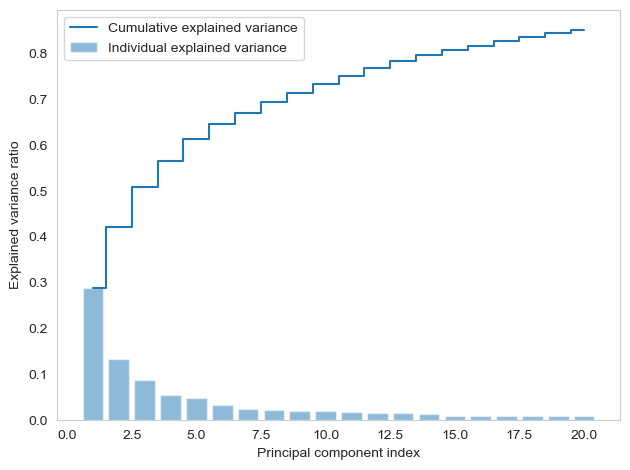

In [80]:
# commulative variance
cum_sum_eigenvalues = np.cumsum(explained_variance_ratio)

# Create the visualization plot
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cum_sum_eigenvalues) + 1), cum_sum_eigenvalues, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

###### Correlation matrix among PCs to check multi-collinearity

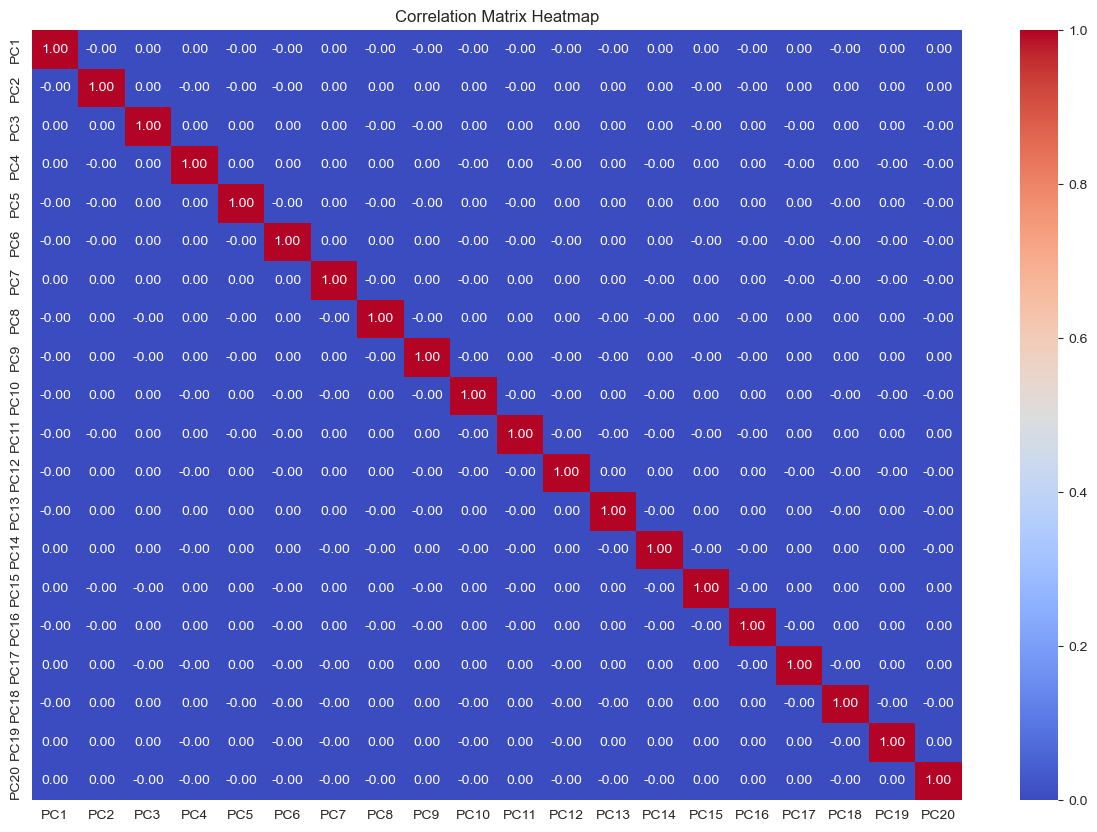

In [81]:
# correlation matix for multi varients analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
correlation_matrix = pca_X.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [82]:
# we can see tha there is no multi collinearity among componets

##### Building Model


In [83]:
# splitting the data into train and test 
# splitting the data into test and train data
pc_X_train, pc_X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.30, random_state=72,stratify=y)
print(pc_X_train.shape)
print(pc_X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43326, 20)
(18569, 20)
(43326,)
(18569,)


In [84]:
# Using Combined sampling to handle imbalanced dataset
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=71, sampling_strategy=1, n_jobs=-1)
pc_X_train, y_train = smt.fit_resample(pc_X_train, y_train)
print(pc_X_train.shape)

(81586, 20)


In [85]:
print(pc_X_train.shape)

(81586, 20)


In [86]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cfl.get_params() 

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [87]:
from sklearn.metrics import accuracy_score

# Train the classifier on the training data
xgb_cfl.fit(pc_X_train, y_train)

# Make predictions on the training set
y_train_pred = xgb_cfl.predict(pc_X_train)


# Calculate accuracy on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)

## Make predictions on the test set
y_test_pred = xgb_cfl.predict(pc_X_test)
#Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)

# Print the results
print(f"Accuracy on Training Set: {accuracy_train:.4f}")
print(f"Accuracy on Test Set: {accuracy_test:.4f}")


Accuracy on Training Set: 0.9470
Accuracy on Test Set: 0.8758


In [88]:
#We we can see that train and test accuracy is very good. We can also imporve the performance by using GridsearchCV and hyperparameterr tunning
## Lets check some other matirx.


In [89]:
# we see that accuracy is 94 % which is quite good on test data.
# Lets check other matirx


In [90]:
confusion_matrix(y_train, y_train_pred)

array([[37635,  3158],
       [ 1163, 39630]])

In [91]:
precision = precision_score(y_test, y_test_pred)
precision

0.25666534023079984

In [92]:
recall = recall_score(y_test, y_test_pred)
recall


0.5950184501845018

In [93]:
# Here recall and percesion is not very good score
#We can see a high amount of type 2 error. Due to class imbalance, the model is clearly trying to predict majority of the cases as class 0

##### Hyper Parameters tunning - Random Search

In [94]:
from sklearn.model_selection import RandomizedSearchCV
# A parameter grid for XGBoost

xgb_lg = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
params = {
        'n_estimators' : [100, 200, 500,760], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25,0.35, 0.45],  # eta
        'min_child_weight': [1, 5, 7, 10,15,20],
        'gamma': [0.3,0.05,0.8,0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0,1.5, 2.0,2.5],
        'colsample_bytree': [0.1,0.3,0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12,16,18,20],
         'scale_pos_weight': [1,2,3,4, 5, 10,20, 30,40], 
        }

folds = 5
param_comb = 800
random_search = RandomizedSearchCV(xgb_lg, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)

In [95]:
random_search.fit(pc_X_train, y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
[CV 1/5] END colsample_bytree=0.8, gamma=1.5, learning_rate=0.25, max_depth=3, min_child_weight=5, n_estimators=500, scale_pos_weight=10, subsample=2.0;, score=nan total time=   0.3s
[CV 5/5] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=40, subsample=1.5;, score=nan total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=760, scale_pos_weight=20, subsample=2.0;, score=nan total time=   0.2s
[CV 2/5] END colsample_bytree=0.6, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=760, scale_pos_weight=1, subsample=2.5;, score=nan total time=   0.2s
[CV 5/5] END colsample_bytree=0.6, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=760, scale_pos_weight=1, subsample=2.5;, score=nan total time=   0.2s
[CV 3/5] END colsample_bytre

[CV 3/5] END colsample_bytree=0.3, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, scale_pos_weight=20, subsample=0.6;, score=0.844 total time=   2.1s
[CV 5/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=20, n_estimators=200, scale_pos_weight=10, subsample=2.0;, score=nan total time=   0.2s
[CV 5/5] END colsample_bytree=0.1, gamma=0.3, learning_rate=0.25, max_depth=16, min_child_weight=15, n_estimators=760, scale_pos_weight=2, subsample=0.6;, score=0.896 total time=  10.8s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.35, max_depth=3, min_child_weight=15, n_estimators=500, scale_pos_weight=40, subsample=2.0;, score=nan total time=   0.3s
[CV 5/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.35, max_depth=3, min_child_weight=15, n_estimators=500, scale_pos_weight=40, subsample=2.0;, score=nan total time=   0.3s
[CV 3/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=4,

[CV 4/5] END colsample_bytree=0.8, gamma=1.5, learning_rate=0.25, max_depth=3, min_child_weight=5, n_estimators=500, scale_pos_weight=10, subsample=2.0;, score=nan total time=   0.3s
[CV 4/5] END colsample_bytree=0.8, gamma=1.5, learning_rate=0.25, max_depth=20, min_child_weight=20, n_estimators=760, scale_pos_weight=4, subsample=0.6;, score=0.949 total time=   7.1s
[CV 5/5] END colsample_bytree=0.1, gamma=0.05, learning_rate=0.1, max_depth=16, min_child_weight=1, n_estimators=500, scale_pos_weight=1, subsample=0.6;, score=0.886 total time=  35.6s
[CV 2/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=20, n_estimators=200, scale_pos_weight=1, subsample=2.0;, score=nan total time=   0.2s
[CV 5/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=20, n_estimators=200, scale_pos_weight=1, subsample=2.0;, score=nan total time=   0.2s
[CV 3/5] END colsample_bytree=0.1, gamma=0.5, learning_rate=0.1, max_depth=18, min_chi

[CV 1/5] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=40, subsample=1.5;, score=nan total time=   0.3s
[CV 1/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=760, scale_pos_weight=20, subsample=2.0;, score=nan total time=   0.2s
[CV 3/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=760, scale_pos_weight=20, subsample=2.0;, score=nan total time=   0.2s
[CV 1/5] END colsample_bytree=0.6, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=760, scale_pos_weight=1, subsample=2.5;, score=nan total time=   0.3s
[CV 4/5] END colsample_bytree=0.6, gamma=5, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=760, scale_pos_weight=1, subsample=2.5;, score=nan total time=   0.2s
[CV 2/5] END colsample_bytree=0.1, gamma=0.05, learning_rate=0.1, max_depth=16, min_child_wei

[CV 3/5] END colsample_bytree=0.8, gamma=1.5, learning_rate=0.25, max_depth=3, min_child_weight=5, n_estimators=500, scale_pos_weight=10, subsample=2.0;, score=nan total time=   0.3s
[CV 5/5] END colsample_bytree=0.8, gamma=1.5, learning_rate=0.25, max_depth=20, min_child_weight=20, n_estimators=760, scale_pos_weight=4, subsample=0.6;, score=0.948 total time=   6.9s
[CV 4/5] END colsample_bytree=0.1, gamma=0.05, learning_rate=0.1, max_depth=16, min_child_weight=1, n_estimators=500, scale_pos_weight=1, subsample=0.6;, score=0.880 total time=  35.9s
[CV 4/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=20, n_estimators=200, scale_pos_weight=1, subsample=2.0;, score=nan total time=   0.2s
[CV 2/5] END colsample_bytree=0.1, gamma=0.5, learning_rate=0.1, max_depth=18, min_child_weight=1, n_estimators=760, scale_pos_weight=4, subsample=0.8;, score=0.872 total time=  44.8s
[CV 1/5] END colsample_bytree=0.6, gamma=0.8, learning_rate=0.01, max_depth=3, min

[CV 2/5] END colsample_bytree=0.8, gamma=1.5, learning_rate=0.25, max_depth=3, min_child_weight=5, n_estimators=500, scale_pos_weight=10, subsample=2.0;, score=nan total time=   0.3s
[CV 2/5] END colsample_bytree=0.8, gamma=1.5, learning_rate=0.25, max_depth=20, min_child_weight=20, n_estimators=760, scale_pos_weight=4, subsample=0.6;, score=0.947 total time=   7.1s
[CV 1/5] END colsample_bytree=0.3, gamma=0.8, learning_rate=0.01, max_depth=12, min_child_weight=20, n_estimators=500, scale_pos_weight=40, subsample=0.6;, score=0.710 total time=  19.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.8, learning_rate=0.01, max_depth=12, min_child_weight=20, n_estimators=500, scale_pos_weight=40, subsample=0.6;, score=0.710 total time=  15.6s
[CV 5/5] END colsample_bytree=0.1, gamma=0.1, learning_rate=0.35, max_depth=18, min_child_weight=10, n_estimators=760, scale_pos_weight=3, subsample=0.8;, score=0.895 total time=  13.7s
[CV 3/5] END colsample_bytree=0.3, gamma=0.8, learning_rate=0.35, max_d

[CV 5/5] END colsample_bytree=0.8, gamma=1.5, learning_rate=0.25, max_depth=3, min_child_weight=5, n_estimators=500, scale_pos_weight=10, subsample=2.0;, score=nan total time=   0.3s
[CV 1/5] END colsample_bytree=0.8, gamma=1.5, learning_rate=0.25, max_depth=20, min_child_weight=20, n_estimators=760, scale_pos_weight=4, subsample=0.6;, score=0.950 total time=   7.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.8, learning_rate=0.01, max_depth=12, min_child_weight=20, n_estimators=500, scale_pos_weight=40, subsample=0.6;, score=0.710 total time=  19.8s
[CV 1/5] END colsample_bytree=0.8, gamma=1.5, learning_rate=0.35, max_depth=12, min_child_weight=1, n_estimators=760, scale_pos_weight=4, subsample=2.5;, score=nan total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, gamma=1.5, learning_rate=0.35, max_depth=12, min_child_weight=1, n_estimators=760, scale_pos_weight=4, subsample=2.5;, score=nan total time=   0.2s
[CV 3/5] END colsample_bytree=0.8, gamma=1.5, learning_rate=0.35, max_depth=12

[CV 2/5] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=40, subsample=1.5;, score=nan total time=   0.3s
[CV 3/5] END colsample_bytree=0.8, gamma=1.5, learning_rate=0.25, max_depth=20, min_child_weight=20, n_estimators=760, scale_pos_weight=4, subsample=0.6;, score=0.948 total time=   7.1s
[CV 2/5] END colsample_bytree=0.3, gamma=0.8, learning_rate=0.01, max_depth=12, min_child_weight=20, n_estimators=500, scale_pos_weight=40, subsample=0.6;, score=0.713 total time=  19.8s
[CV 5/5] END colsample_bytree=0.3, gamma=0.8, learning_rate=0.01, max_depth=12, min_child_weight=20, n_estimators=500, scale_pos_weight=40, subsample=0.6;, score=0.709 total time=  15.4s
[CV 1/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=20, n_estimators=200, scale_pos_weight=1, subsample=2.0;, score=nan total time=   0.3s
[CV 3/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=4, m

[CV 1/5] END colsample_bytree=0.8, gamma=1.5, learning_rate=0.35, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=4, subsample=0.8;, score=0.909 total time=   1.8s
[CV 1/5] END colsample_bytree=0.1, gamma=0.1, learning_rate=0.45, max_depth=18, min_child_weight=20, n_estimators=760, scale_pos_weight=30, subsample=1.0;, score=0.872 total time=  10.0s
[CV 1/5] END colsample_bytree=0.8, gamma=0.05, learning_rate=0.05, max_depth=18, min_child_weight=7, n_estimators=200, scale_pos_weight=1, subsample=1.0;, score=0.960 total time=  10.1s
[CV 4/5] END colsample_bytree=0.8, gamma=0.05, learning_rate=0.35, max_depth=10, min_child_weight=1, n_estimators=200, scale_pos_weight=40, subsample=0.6;, score=0.943 total time=   5.4s
[CV 2/5] END colsample_bytree=0.8, gamma=5, learning_rate=0.25, max_depth=16, min_child_weight=15, n_estimators=500, scale_pos_weight=20, subsample=0.6;, score=0.911 total time=   3.7s
[CV 5/5] END colsample_bytree=0.8, gamma=5, learning_rate=0.25, max_dep

[CV 4/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=16, min_child_weight=20, n_estimators=100, scale_pos_weight=30, subsample=0.6;, score=0.827 total time=   6.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.8, learning_rate=0.25, max_depth=4, min_child_weight=15, n_estimators=760, scale_pos_weight=30, subsample=1.0;, score=0.857 total time=   4.2s
[CV 5/5] END colsample_bytree=0.3, gamma=0.8, learning_rate=0.25, max_depth=4, min_child_weight=15, n_estimators=760, scale_pos_weight=30, subsample=1.0;, score=0.853 total time=   4.4s
[CV 5/5] END colsample_bytree=0.3, gamma=5, learning_rate=0.01, max_depth=20, min_child_weight=15, n_estimators=100, scale_pos_weight=3, subsample=1.5;, score=nan total time=   0.2s
[CV 3/5] END colsample_bytree=1.0, gamma=5, learning_rate=0.1, max_depth=18, min_child_weight=7, n_estimators=760, scale_pos_weight=40, subsample=2.0;, score=nan total time=   0.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.5, learning_rate=0.01, max_depth=5,

[CV 3/5] END colsample_bytree=0.3, gamma=1.5, learning_rate=0.45, max_depth=3, min_child_weight=10, n_estimators=760, scale_pos_weight=5, subsample=2.5;, score=nan total time=   0.2s
[CV 1/5] END colsample_bytree=0.3, gamma=1, learning_rate=0.35, max_depth=3, min_child_weight=10, n_estimators=500, scale_pos_weight=4, subsample=2.5;, score=nan total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=1, learning_rate=0.35, max_depth=3, min_child_weight=10, n_estimators=500, scale_pos_weight=4, subsample=2.5;, score=nan total time=   0.2s
[CV 3/5] END colsample_bytree=0.1, gamma=0.5, learning_rate=0.35, max_depth=20, min_child_weight=1, n_estimators=200, scale_pos_weight=2, subsample=1.5;, score=nan total time=   0.2s
[CV 1/5] END colsample_bytree=0.8, gamma=0.05, learning_rate=0.35, max_depth=10, min_child_weight=1, n_estimators=200, scale_pos_weight=40, subsample=0.6;, score=0.948 total time=   5.6s
[CV 1/5] END colsample_bytree=0.1, gamma=1.5, learning_rate=0.35, max_depth=4, min_ch

[CV 4/5] END colsample_bytree=1.0, gamma=0.8, learning_rate=0.45, max_depth=20, min_child_weight=7, n_estimators=500, scale_pos_weight=30, subsample=1.0;, score=0.931 total time=   5.4s
[CV 2/5] END colsample_bytree=0.1, gamma=0.05, learning_rate=0.1, max_depth=12, min_child_weight=10, n_estimators=100, scale_pos_weight=30, subsample=1.0;, score=0.659 total time=   3.5s
[CV 1/5] END colsample_bytree=0.1, gamma=0.8, learning_rate=0.35, max_depth=5, min_child_weight=10, n_estimators=100, scale_pos_weight=1, subsample=1.5;, score=nan total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.02, max_depth=18, min_child_weight=5, n_estimators=100, scale_pos_weight=5, subsample=1.5;, score=nan total time=   0.2s
[CV 4/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.25, max_depth=18, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=2.5;, score=nan total time=   0.2s
[CV 2/5] END colsample_bytree=0.1, gamma=5, learning_rate=0.1, max_depth=5, min_

[CV 5/5] END colsample_bytree=0.1, gamma=1.5, learning_rate=0.35, max_depth=4, min_child_weight=15, n_estimators=500, scale_pos_weight=2, subsample=0.6;, score=0.869 total time=   2.4s
[CV 1/5] END colsample_bytree=0.8, gamma=5, learning_rate=0.25, max_depth=16, min_child_weight=15, n_estimators=500, scale_pos_weight=20, subsample=0.6;, score=0.916 total time=   3.7s
[CV 4/5] END colsample_bytree=0.8, gamma=5, learning_rate=0.25, max_depth=16, min_child_weight=15, n_estimators=500, scale_pos_weight=20, subsample=0.6;, score=0.915 total time=   3.8s
[CV 2/5] END colsample_bytree=0.1, gamma=1.5, learning_rate=0.35, max_depth=10, min_child_weight=1, n_estimators=100, scale_pos_weight=40, subsample=1.0;, score=0.799 total time=   2.2s
[CV 4/5] END colsample_bytree=0.1, gamma=1.5, learning_rate=0.35, max_depth=10, min_child_weight=1, n_estimators=100, scale_pos_weight=40, subsample=1.0;, score=0.795 total time=   2.3s
[CV 2/5] END colsample_bytree=0.8, gamma=0.8, learning_rate=0.35, max_dep

[CV 4/5] END colsample_bytree=1.0, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=20, n_estimators=100, scale_pos_weight=5, subsample=2.0;, score=nan total time=   0.2s
[CV 5/5] END colsample_bytree=1.0, gamma=5, learning_rate=0.01, max_depth=4, min_child_weight=20, n_estimators=100, scale_pos_weight=5, subsample=2.0;, score=nan total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=5, learning_rate=0.45, max_depth=5, min_child_weight=15, n_estimators=500, scale_pos_weight=30, subsample=0.6;, score=0.891 total time=   3.3s
[CV 4/5] END colsample_bytree=0.3, gamma=5, learning_rate=0.45, max_depth=5, min_child_weight=15, n_estimators=500, scale_pos_weight=30, subsample=0.6;, score=0.890 total time=   3.3s
[CV 2/5] END colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=20, min_child_weight=5, n_estimators=100, scale_pos_weight=20, subsample=0.6;, score=0.856 total time=  11.9s
[CV 5/5] END colsample_bytree=0.3, gamma=1, learning_rate=0.05, max_depth=20, min_chil

[CV 3/5] END colsample_bytree=0.1, gamma=1.5, learning_rate=0.35, max_depth=4, min_child_weight=15, n_estimators=500, scale_pos_weight=2, subsample=0.6;, score=0.864 total time=   2.4s
[CV 4/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.02, max_depth=16, min_child_weight=1, n_estimators=500, scale_pos_weight=10, subsample=0.6;, score=0.944 total time=  43.1s
[CV 3/5] END colsample_bytree=0.1, gamma=0.8, learning_rate=0.45, max_depth=16, min_child_weight=1, n_estimators=760, scale_pos_weight=4, subsample=0.6;, score=0.857 total time=  10.7s
[CV 5/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=20, n_estimators=500, scale_pos_weight=40, subsample=1.0;, score=0.821 total time=   3.9s
[CV 2/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=12, min_child_weight=20, n_estimators=500, scale_pos_weight=1, subsample=1.0;, score=0.935 total time=   6.6s
[CV 5/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.05, max_depth=12, m

[CV 2/5] END colsample_bytree=0.1, gamma=0.05, learning_rate=0.45, max_depth=16, min_child_weight=20, n_estimators=500, scale_pos_weight=10, subsample=0.8;, score=0.883 total time=  11.6s
[CV 3/5] END colsample_bytree=0.8, gamma=5, learning_rate=0.35, max_depth=20, min_child_weight=20, n_estimators=500, scale_pos_weight=10, subsample=0.8;, score=0.913 total time=   2.7s
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=16, min_child_weight=5, n_estimators=100, scale_pos_weight=40, subsample=0.6;, score=0.815 total time=   8.3s
[CV 1/5] END colsample_bytree=0.1, gamma=0.8, learning_rate=0.01, max_depth=4, min_child_weight=20, n_estimators=760, scale_pos_weight=5, subsample=2.0;, score=nan total time=   0.2s
[CV 2/5] END colsample_bytree=0.1, gamma=0.8, learning_rate=0.01, max_depth=4, min_child_weight=20, n_estimators=760, scale_pos_weight=5, subsample=2.0;, score=nan total time=   0.2s
[CV 3/5] END colsample_bytree=0.1, gamma=0.8, learning_rate=0.01, max_depth

[CV 3/5] END colsample_bytree=1.0, gamma=0.8, learning_rate=0.25, max_depth=5, min_child_weight=15, n_estimators=500, scale_pos_weight=30, subsample=2.5;, score=nan total time=   0.2s
[CV 1/5] END colsample_bytree=0.1, gamma=0.3, learning_rate=0.25, max_depth=4, min_child_weight=10, n_estimators=760, scale_pos_weight=2, subsample=0.8;, score=0.874 total time=   4.0s
[CV 4/5] END colsample_bytree=0.1, gamma=0.3, learning_rate=0.25, max_depth=4, min_child_weight=10, n_estimators=760, scale_pos_weight=2, subsample=0.8;, score=0.878 total time=   4.1s
[CV 3/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.35, max_depth=10, min_child_weight=10, n_estimators=500, scale_pos_weight=2, subsample=1.0;, score=0.946 total time=   3.6s
[CV 1/5] END colsample_bytree=1.0, gamma=0.8, learning_rate=0.45, max_depth=20, min_child_weight=7, n_estimators=500, scale_pos_weight=30, subsample=1.0;, score=0.938 total time=   5.9s
[CV 5/5] END colsample_bytree=1.0, gamma=0.8, learning_rate=0.45, max_depth=

[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=16, min_child_weight=5, n_estimators=100, scale_pos_weight=40, subsample=0.6;, score=0.813 total time=   8.2s
[CV 5/5] END colsample_bytree=0.1, gamma=5, learning_rate=0.25, max_depth=10, min_child_weight=20, n_estimators=500, scale_pos_weight=3, subsample=1.0;, score=0.844 total time=   2.1s
[CV 1/5] END colsample_bytree=0.1, gamma=0.8, learning_rate=0.01, max_depth=4, min_child_weight=15, n_estimators=500, scale_pos_weight=4, subsample=2.5;, score=nan total time=   0.2s
[CV 2/5] END colsample_bytree=0.1, gamma=0.8, learning_rate=0.01, max_depth=4, min_child_weight=15, n_estimators=500, scale_pos_weight=4, subsample=2.5;, score=nan total time=   0.3s
[CV 4/5] END colsample_bytree=0.1, gamma=0.8, learning_rate=0.01, max_depth=4, min_child_weight=15, n_estimators=500, scale_pos_weight=4, subsample=2.5;, score=nan total time=   0.2s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.45, max_depth=12, m

[CV 1/5] END colsample_bytree=0.1, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=5, n_estimators=500, scale_pos_weight=30, subsample=1.0;, score=0.540 total time=   2.2s
[CV 4/5] END colsample_bytree=0.1, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=5, n_estimators=500, scale_pos_weight=30, subsample=1.0;, score=0.533 total time=   2.1s
[CV 2/5] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=30, subsample=0.6;, score=0.729 total time=   1.5s
[CV 5/5] END colsample_bytree=0.3, gamma=0.05, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=30, subsample=0.6;, score=0.722 total time=   1.5s
[CV 3/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=7, n_estimators=200, scale_pos_weight=5, subsample=0.8;, score=0.935 total time=   4.0s
[CV 1/5] END colsample_bytree=1.0, gamma=0.8, learning_rate=0.01, max_depth=10, 

[CV 1/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=2.0;, score=nan total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=2.0;, score=nan total time=   0.2s
[CV 3/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=2.0;, score=nan total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=2, subsample=2.0;, score=nan total time=   0.2s
[CV 1/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.35, max_depth=5, min_child_weight=7, n_estimators=760, scale_pos_weight=20, subsample=0.8;, score=0.934 total time=   5.6s
[CV 2/5] END colsample_bytree=0.3, gamma=0.5, learning_rate=0.1, max_depth=12, min_child_weight=1

[CV 5/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.25, max_depth=5, min_child_weight=1, n_estimators=760, scale_pos_weight=20, subsample=1.0;, score=0.933 total time=   6.8s
[CV 3/5] END colsample_bytree=1.0, gamma=0.8, learning_rate=0.01, max_depth=20, min_child_weight=7, n_estimators=200, scale_pos_weight=3, subsample=0.6;, score=0.897 total time=  15.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0.5, learning_rate=0.1, max_depth=12, min_child_weight=1, n_estimators=500, scale_pos_weight=2, subsample=1.5;, score=nan total time=   0.2s
[CV 1/5] END colsample_bytree=1.0, gamma=0.8, learning_rate=0.02, max_depth=16, min_child_weight=15, n_estimators=200, scale_pos_weight=3, subsample=2.5;, score=nan total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, gamma=0.8, learning_rate=0.02, max_depth=16, min_child_weight=15, n_estimators=200, scale_pos_weight=3, subsample=2.5;, score=nan total time=   0.2s
[CV 2/5] END colsample_bytree=0.1, gamma=0.5, learning_rate=0.05, max_depth=20, 

[CV 3/5] END colsample_bytree=0.3, gamma=5, learning_rate=0.25, max_depth=18, min_child_weight=15, n_estimators=200, scale_pos_weight=30, subsample=0.6;, score=0.887 total time=   2.6s
[CV 2/5] END colsample_bytree=0.1, gamma=1.5, learning_rate=0.25, max_depth=5, min_child_weight=7, n_estimators=200, scale_pos_weight=20, subsample=2.5;, score=nan total time=   0.3s
[CV 4/5] END colsample_bytree=0.1, gamma=1.5, learning_rate=0.25, max_depth=5, min_child_weight=7, n_estimators=200, scale_pos_weight=20, subsample=2.5;, score=nan total time=   0.2s
[CV 2/5] END colsample_bytree=0.6, gamma=5, learning_rate=0.1, max_depth=16, min_child_weight=20, n_estimators=100, scale_pos_weight=2, subsample=2.5;, score=nan total time=   0.2s
[CV 5/5] END colsample_bytree=0.6, gamma=5, learning_rate=0.1, max_depth=16, min_child_weight=20, n_estimators=100, scale_pos_weight=2, subsample=2.5;, score=nan total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=5, learning_rate=0.02, max_depth=18, min_child

[CV 5/5] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=16, min_child_weight=1, n_estimators=760, scale_pos_weight=2, subsample=0.8;, score=0.965 total time=  16.8s
[CV 2/5] END colsample_bytree=0.8, gamma=5, learning_rate=0.45, max_depth=12, min_child_weight=15, n_estimators=100, scale_pos_weight=5, subsample=0.6;, score=0.920 total time=   1.1s
[CV 4/5] END colsample_bytree=0.8, gamma=0.8, learning_rate=0.02, max_depth=18, min_child_weight=1, n_estimators=760, scale_pos_weight=30, subsample=0.6;, score=0.939 total time= 2.5min
[CV 4/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.02, max_depth=3, min_child_weight=15, n_estimators=760, scale_pos_weight=3, subsample=0.6;, score=0.787 total time=   3.6s
[CV 1/5] END colsample_bytree=0.3, gamma=1, learning_rate=0.35, max_depth=3, min_child_weight=10, n_estimators=760, scale_pos_weight=4, subsample=2.5;, score=nan total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=1, learning_rate=0.35, max_depth=3, min

[CV 4/5] END colsample_bytree=0.8, gamma=1.5, learning_rate=0.1, max_depth=16, min_child_weight=5, n_estimators=200, scale_pos_weight=10, subsample=1.5;, score=nan total time=   0.2s
[CV 5/5] END colsample_bytree=0.8, gamma=1.5, learning_rate=0.1, max_depth=16, min_child_weight=5, n_estimators=200, scale_pos_weight=10, subsample=1.5;, score=nan total time=   0.2s
[CV 1/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=18, min_child_weight=5, n_estimators=200, scale_pos_weight=3, subsample=2.5;, score=nan total time=   0.2s
[CV 2/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=18, min_child_weight=5, n_estimators=200, scale_pos_weight=3, subsample=2.5;, score=nan total time=   0.2s
[CV 3/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=18, min_child_weight=5, n_estimators=200, scale_pos_weight=3, subsample=2.5;, score=nan total time=   0.2s
[CV 4/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=18, min_c

[CV 5/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.25, max_depth=3, min_child_weight=7, n_estimators=760, scale_pos_weight=30, subsample=1.5;, score=nan total time=   0.3s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.45, max_depth=4, min_child_weight=7, n_estimators=200, scale_pos_weight=5, subsample=1.0;, score=0.871 total time=   1.2s
[CV 1/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.02, max_depth=18, min_child_weight=7, n_estimators=100, scale_pos_weight=5, subsample=1.5;, score=nan total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.02, max_depth=18, min_child_weight=7, n_estimators=100, scale_pos_weight=5, subsample=1.5;, score=nan total time=   0.2s
[CV 4/5] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.02, max_depth=18, min_child_weight=7, n_estimators=100, scale_pos_weight=5, subsample=1.5;, score=nan total time=   0.2s
[CV 2/5] END colsample_bytree=0.1, gamma=0.05, learning_rate=0.25, max_depth=20, min_c

[CV 5/5] END colsample_bytree=0.3, gamma=1, learning_rate=0.35, max_depth=20, min_child_weight=5, n_estimators=100, scale_pos_weight=10, subsample=0.6;, score=0.928 total time=   3.7s
[CV 4/5] END colsample_bytree=0.6, gamma=1.5, learning_rate=0.45, max_depth=3, min_child_weight=20, n_estimators=500, scale_pos_weight=10, subsample=0.8;, score=0.851 total time=   2.6s
[CV 4/5] END colsample_bytree=0.1, gamma=1.5, learning_rate=0.02, max_depth=5, min_child_weight=15, n_estimators=500, scale_pos_weight=2, subsample=0.8;, score=0.788 total time=   3.6s
[CV 5/5] END colsample_bytree=0.3, gamma=1, learning_rate=0.01, max_depth=12, min_child_weight=15, n_estimators=200, scale_pos_weight=2, subsample=0.8;, score=0.836 total time=   7.6s
[CV 1/5] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.05, max_depth=12, min_child_weight=10, n_estimators=100, scale_pos_weight=5, subsample=1.0;, score=0.900 total time=   5.4s
[CV 4/5] END colsample_bytree=0.6, gamma=0.05, learning_rate=0.05, max_dep

[CV 2/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.02, max_depth=20, min_child_weight=20, n_estimators=760, scale_pos_weight=3, subsample=2.5;, score=nan total time=   0.3s
[CV 1/5] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=2, subsample=1.0;, score=0.902 total time=   1.7s
[CV 2/5] END colsample_bytree=0.1, gamma=0.8, learning_rate=0.1, max_depth=16, min_child_weight=5, n_estimators=500, scale_pos_weight=1, subsample=1.0;, score=0.887 total time=  10.0s
[CV 1/5] END colsample_bytree=1.0, gamma=5, learning_rate=0.02, max_depth=3, min_child_weight=20, n_estimators=200, scale_pos_weight=5, subsample=1.0;, score=0.671 total time=   1.2s
[CV 5/5] END colsample_bytree=1.0, gamma=5, learning_rate=0.02, max_depth=3, min_child_weight=20, n_estimators=200, scale_pos_weight=5, subsample=1.0;, score=0.673 total time=   1.2s
[CV 1/5] END colsample_bytree=0.8, gamma=0.8, learning_rate=0.02, max_depth=10, min_

[CV 1/5] END colsample_bytree=0.1, gamma=0.05, learning_rate=0.05, max_depth=16, min_child_weight=7, n_estimators=100, scale_pos_weight=2, subsample=2.5;, score=nan total time=   0.2s
[CV 4/5] END colsample_bytree=0.1, gamma=0.05, learning_rate=0.05, max_depth=16, min_child_weight=7, n_estimators=100, scale_pos_weight=2, subsample=2.5;, score=nan total time=   0.3s
[CV 5/5] END colsample_bytree=1.0, gamma=0.8, learning_rate=0.01, max_depth=18, min_child_weight=5, n_estimators=200, scale_pos_weight=4, subsample=0.6;, score=0.890 total time=  22.6s
[CV 5/5] END colsample_bytree=0.6, gamma=5, learning_rate=0.25, max_depth=3, min_child_weight=15, n_estimators=500, scale_pos_weight=40, subsample=0.8;, score=0.769 total time=   2.7s
[CV 4/5] END colsample_bytree=0.1, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=10, n_estimators=500, scale_pos_weight=1, subsample=0.8;, score=0.825 total time=   2.4s
[CV 5/5] END colsample_bytree=0.1, gamma=0.8, learning_rate=0.1, max_depth=3, mi

[CV 1/5] END colsample_bytree=0.6, gamma=0.8, learning_rate=0.25, max_depth=10, min_child_weight=15, n_estimators=200, scale_pos_weight=40, subsample=0.8;, score=0.931 total time=   4.0s
[CV 4/5] END colsample_bytree=0.6, gamma=0.8, learning_rate=0.25, max_depth=10, min_child_weight=15, n_estimators=200, scale_pos_weight=40, subsample=0.8;, score=0.927 total time=   4.2s
[CV 3/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=10, n_estimators=100, scale_pos_weight=30, subsample=1.0;, score=0.505 total time=   0.9s
[CV 4/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=10, n_estimators=100, scale_pos_weight=30, subsample=1.0;, score=0.505 total time=   0.8s
[CV 1/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.45, max_depth=5, min_child_weight=5, n_estimators=500, scale_pos_weight=2, subsample=1.0;, score=0.922 total time=   2.1s
[CV 3/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=1

[CV 5/5] END colsample_bytree=0.1, gamma=1.5, learning_rate=0.45, max_depth=16, min_child_weight=10, n_estimators=760, scale_pos_weight=30, subsample=1.5;, score=nan total time=   0.2s
[CV 1/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.02, max_depth=18, min_child_weight=15, n_estimators=200, scale_pos_weight=40, subsample=2.0;, score=nan total time=   0.2s
[CV 3/5] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=40, subsample=1.5;, score=nan total time=   0.2s
[CV 2/5] END colsample_bytree=0.1, gamma=0.05, learning_rate=0.1, max_depth=12, min_child_weight=1, n_estimators=200, scale_pos_weight=4, subsample=2.0;, score=nan total time=   0.2s
[CV 5/5] END colsample_bytree=0.1, gamma=0.05, learning_rate=0.1, max_depth=12, min_child_weight=1, n_estimators=200, scale_pos_weight=4, subsample=2.0;, score=nan total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=12, min

[CV 2/5] END colsample_bytree=0.1, gamma=1, learning_rate=0.1, max_depth=16, min_child_weight=1, n_estimators=500, scale_pos_weight=1, subsample=0.8;, score=0.885 total time=  11.0s
[CV 4/5] END colsample_bytree=0.1, gamma=0.3, learning_rate=0.35, max_depth=20, min_child_weight=7, n_estimators=500, scale_pos_weight=5, subsample=0.6;, score=0.875 total time=   7.8s
[CV 3/5] END colsample_bytree=1.0, gamma=1, learning_rate=0.25, max_depth=16, min_child_weight=15, n_estimators=760, scale_pos_weight=2, subsample=0.6;, score=0.954 total time=   6.2s
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.35, max_depth=4, min_child_weight=15, n_estimators=500, scale_pos_weight=4, subsample=1.0;, score=0.897 total time=   3.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.35, max_depth=4, min_child_weight=15, n_estimators=500, scale_pos_weight=4, subsample=1.0;, score=0.895 total time=   3.0s
[CV 4/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.25, max_depth=16,

[CV 5/5] END colsample_bytree=0.1, gamma=0.8, learning_rate=0.25, max_depth=10, min_child_weight=10, n_estimators=200, scale_pos_weight=4, subsample=0.6;, score=0.856 total time=   3.3s
[CV 2/5] END colsample_bytree=0.6, gamma=0.8, learning_rate=0.25, max_depth=10, min_child_weight=15, n_estimators=200, scale_pos_weight=40, subsample=0.8;, score=0.928 total time=   4.1s
[CV 5/5] END colsample_bytree=0.6, gamma=0.8, learning_rate=0.25, max_depth=10, min_child_weight=15, n_estimators=200, scale_pos_weight=40, subsample=0.8;, score=0.931 total time=   3.8s
[CV 3/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.45, max_depth=5, min_child_weight=5, n_estimators=500, scale_pos_weight=2, subsample=1.0;, score=0.922 total time=   2.0s
[CV 1/5] END colsample_bytree=0.3, gamma=5, learning_rate=0.02, max_depth=4, min_child_weight=5, n_estimators=100, scale_pos_weight=30, subsample=2.5;, score=nan total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, gamma=5, learning_rate=0.02, max_depth=4, 

[CV 1/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=10, n_estimators=100, scale_pos_weight=30, subsample=1.0;, score=0.503 total time=   0.8s
[CV 2/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=10, n_estimators=100, scale_pos_weight=30, subsample=1.0;, score=0.504 total time=   0.9s
[CV 5/5] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=10, n_estimators=100, scale_pos_weight=30, subsample=1.0;, score=0.506 total time=   0.9s
[CV 2/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.45, max_depth=5, min_child_weight=5, n_estimators=500, scale_pos_weight=2, subsample=1.0;, score=0.927 total time=   2.2s
[CV 4/5] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=12, min_child_weight=1, n_estimators=200, scale_pos_weight=5, subsample=0.8;, score=0.951 total time=  10.0s
[CV 2/5] END colsample_bytree=0.1, gamma=0.3, learning_rate=0.25, max_depth=16, mi

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'colsample_bytree': [0.1, 0.3, 0.6, 0.8,
                                                             1.0],
                                        'gamma': [0.3, 0.05, 0.8, 0.1, 0.5, 1,
                                                  1.5, 5],
                                        'learning_rate': [0.01, 0.02, 0.05, 0.1,
                                                          0.25, 0.35, 0.45],
                                        'max_depth': [3, 4, 5, 10, 12, 16, 18,
                                                      20],
                                        'min_child_weight': [1, 5, 7, 10, 15,
                                                             20],
                                        'n_estimators': [100, 200, 500, 760],
                                        'scale_pos_weight': [1, 2, 3, 4, 5, 10,
                                                             20, 30, 40],
                                        'subsample': [0.6, 0.8, 1.0, 1.5, 2.0,
                                                      2.5]},
                   random_state=42, scoring='accuracy', verbose=3)

In [96]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best estimator:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=760, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

 Best accuracy for 5-fold search with 800 parameter combinations:
0.9694310006708236

 Best hyperparameters:
{'subsample': 0.6, 'scale_pos_weight': 1, 'n_estimators': 760, 'min_child_weight': 1, 'max_depth': 16, 'learning_rate': 0.1, 

In [97]:
# Lets build the model using best parameters
params = random_search.best_params_
model = xgb.XGBClassifier(**params, random_state=71)
model.fit(pc_X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=760, n_jobs=None,
              num_parallel_tree=None, random_state=71, ...)

##### Testing the model accuracy

In [98]:

# Train the classifier on the training data
#model.fit(pc_X_train, y_train)

# Make predictions on the training set
y_train_pred_ran = model.predict(pc_X_train)



# Calculate accuracy on the training set
accuracy_train_ran = accuracy_score(y_train, y_train_pred_ran)

## Make predictions on the test set
y_test_pred_ran = model.predict(pc_X_test)

#Calculate accuracy on the test set
accuracy_test_ran = accuracy_score(y_test, y_test_pred_ran)

# Print the results
print(f"Accuracy on Training Set: {accuracy_train_ran:.4f}")
print(f"Accuracy on Test Set: {accuracy_test_ran:.4f}")

Accuracy on Training Set: 1.0000
Accuracy on Test Set: 0.9254


In [99]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_ran).ravel()

# Calculate specificity and sensitivity (recall)
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# Print the results
print('Specificity:', specificity)
print('Sensitivity (Recall):', sensitivity)

Specificity: 0.9560766371175293
Sensitivity (Recall): 0.42988929889298894


In [100]:
confusion_matrix(y_test, y_test_pred_ran)

array([[16717,   768],
       [  618,   466]])

In [101]:
precision = precision_score(y_test, y_test_pred_ran)
precision

0.37763371150729336

In [102]:
recall = recall_score(y_test, y_test_pred_ran)
recall

0.42988929889298894

In [103]:
y_train.shape

(81586,)

In [104]:
print(pc_X_train.shape)
print(pc_X_test.shape)
print(y_train.shape)
print(y_test.shape)

(81586, 20)
(18569, 20)
(81586,)
(18569,)


### 7.  Creating Submission File


In [105]:
# lets check the sample results
sample.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [106]:
# Lets prepare the test data for testing

In [107]:
ids=pd.DataFrame(test['id'])
test=test[X.columns]
print(test.shape)
ids.shape

(30000, 147)


(30000, 1)

In [108]:
missing_values = test.isna().sum()
percentage_missing = (missing_values / len(test)).sort_values(ascending=False)
percentage_missing 
# Display the result

days_stayed                 0.112667
date_of_last_rech_8         0.105500
date_of_last_rech_6         0.096967
date_of_last_rech_7         0.096133
spl_ic_mou_8                0.055833
                              ...   
vol_3g_mb_7                 0.000000
vol_3g_mb_8                 0.000000
monthly_2g_6                0.000000
monthly_2g_7                0.000000
decrease_rech_num_action    0.000000
Length: 147, dtype: float64

In [109]:
missing_data_percent_test = test.isnull().any()
impute_cols_test = missing_data_percent_test[missing_data_percent_test.gt(0)].index


In [110]:
impute_cols_test

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'lo

In [111]:
# Missing value treatment

from sklearn.impute import SimpleImputer

# Imputer for numerical columns
num_imputer = SimpleImputer(strategy='mean')
test[impute_cols_test] = num_imputer.fit_transform(test[impute_cols_test])

In [112]:
(test.isna().sum()*100/len(test)).sort_values(ascending=False)


arpu_6                      0.0
vol_3g_mb_8                 0.0
total_rech_amt_7            0.0
total_rech_amt_8            0.0
max_rech_amt_6              0.0
                           ... 
og_others_7                 0.0
og_others_8                 0.0
total_og_mou_6              0.0
total_og_mou_7              0.0
decrease_rech_num_action    0.0
Length: 147, dtype: float64

In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Fit and transform the test data using the previously fitted StandardScaler
test_scaled = pd.DataFrame(data=ss.transform(test), columns=test.columns)

# Apply PCA on the test data
pca_test = pca.transform(test_scaled)
pca_test

array([[ -6.19112922,  -1.51931849,  -1.4264827 , ...,  -4.194273  ,
         -2.99714633,   0.30849492],
       [  5.34133968,  -5.60637352,   0.40653122, ...,  -3.72043325,
         -4.06585784,   0.04190667],
       [ -1.97847759,   1.09938122,   3.15599181, ...,  -4.18549719,
         -3.2086835 ,  -1.06637482],
       ...,
       [ -6.89206829,  -0.06925705,  -0.31718187, ...,  -4.08804837,
         -3.55834206,  -1.04626202],
       [ 14.76822036,  17.75563915, -18.37077428, ...,   3.69244693,
         -7.91659853,   2.3981529 ],
       [  1.27920104,   4.92514817,   4.17342678, ...,   2.34485807,
         -4.73998832,  -2.41224829]])

In [114]:
pca_test.shape

(30000, 20)

In [115]:

# Convert the PCA results to a DataFrame
pca_test_df = pd.DataFrame(data=pca_test, columns=columns)


In [116]:
ids.dtypes


id    int64
dtype: object

In [117]:
# result using xgboost model
xgb_result = pd.DataFrame(pd.DataFrame(model.predict(pca_test_df),columns=['churn_probability']))
output = pd.concat([ids, xgb_result],axis=1 )
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [118]:
output = pd.concat([ids, xgb_result],axis=1 )
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [119]:
output.to_csv('Submission.csv',index=False)
output.shape

(30000, 2)

In [120]:
output.shape

(30000, 2)

###  8. Part two: Important Features Selections

In [121]:
# splitting the data into train and test 
# splitting the data into test and train data
X_train_test, X_test_test, y_train_test, y_test_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42,stratify=y)                                                                       
# Using Combined sampling to handle imbalanced dataset
smt = SMOTETomek(random_state=40, sampling_strategy=0.2, n_jobs=-1)
X_train_test, y_train_test = smt.fit_resample(X_train_test, y_train_test)
print(X_train_test.shape)
print(X_test_test.shape)
print(y_train_test.shape)
print(y_test_test.shape)


(48911, 147)
(18569, 147)
(48911,)
(18569,)


In [122]:
# extract feature importanceImp

from xgboost import XGBClassifier
imp_feature_model = XGBClassifier(random_state=80)
imp_feature_model.fit(X_train_test, y_train_test)
importance = imp_feature_model.feature_importances_
# summarize feature importance
feature_imp=pd.DataFrame({"feature":X_train_test.columns,"importance":importance/np.sum(importance)*100})
feature_imp.sort_values(by='importance',ascending=False,inplace=True)
feature_imp=feature_imp[feature_imp.importance>0]
feature_imp

,feature,importance
80,total_ic_mou_8,21.589979
65,loc_ic_mou_8,7.093407
101,date_of_last_rech_8,3.512749
135,decrease_arpu_action,2.639903
141,decrease_mou_action,2.444579
91,total_rech_num_7,2.263006
104,last_day_rch_amt_8,2.233981
92,total_rech_num_8,2.081431
90,total_rech_num_6,1.942904
146,decrease_rech_num_action,1.807736


In [123]:
# displaying the datails on most 20 important feature
feature_imp_10=feature_imp.head(10)
print(feature_imp_10.shape)
feature_imp_10

(10, 2)


,feature,importance
80,total_ic_mou_8,21.589979
65,loc_ic_mou_8,7.093407
101,date_of_last_rech_8,3.512749
135,decrease_arpu_action,2.639903
141,decrease_mou_action,2.444579
91,total_rech_num_7,2.263006
104,last_day_rch_amt_8,2.233981
92,total_rech_num_8,2.081431
90,total_rech_num_6,1.942904
146,decrease_rech_num_action,1.807736


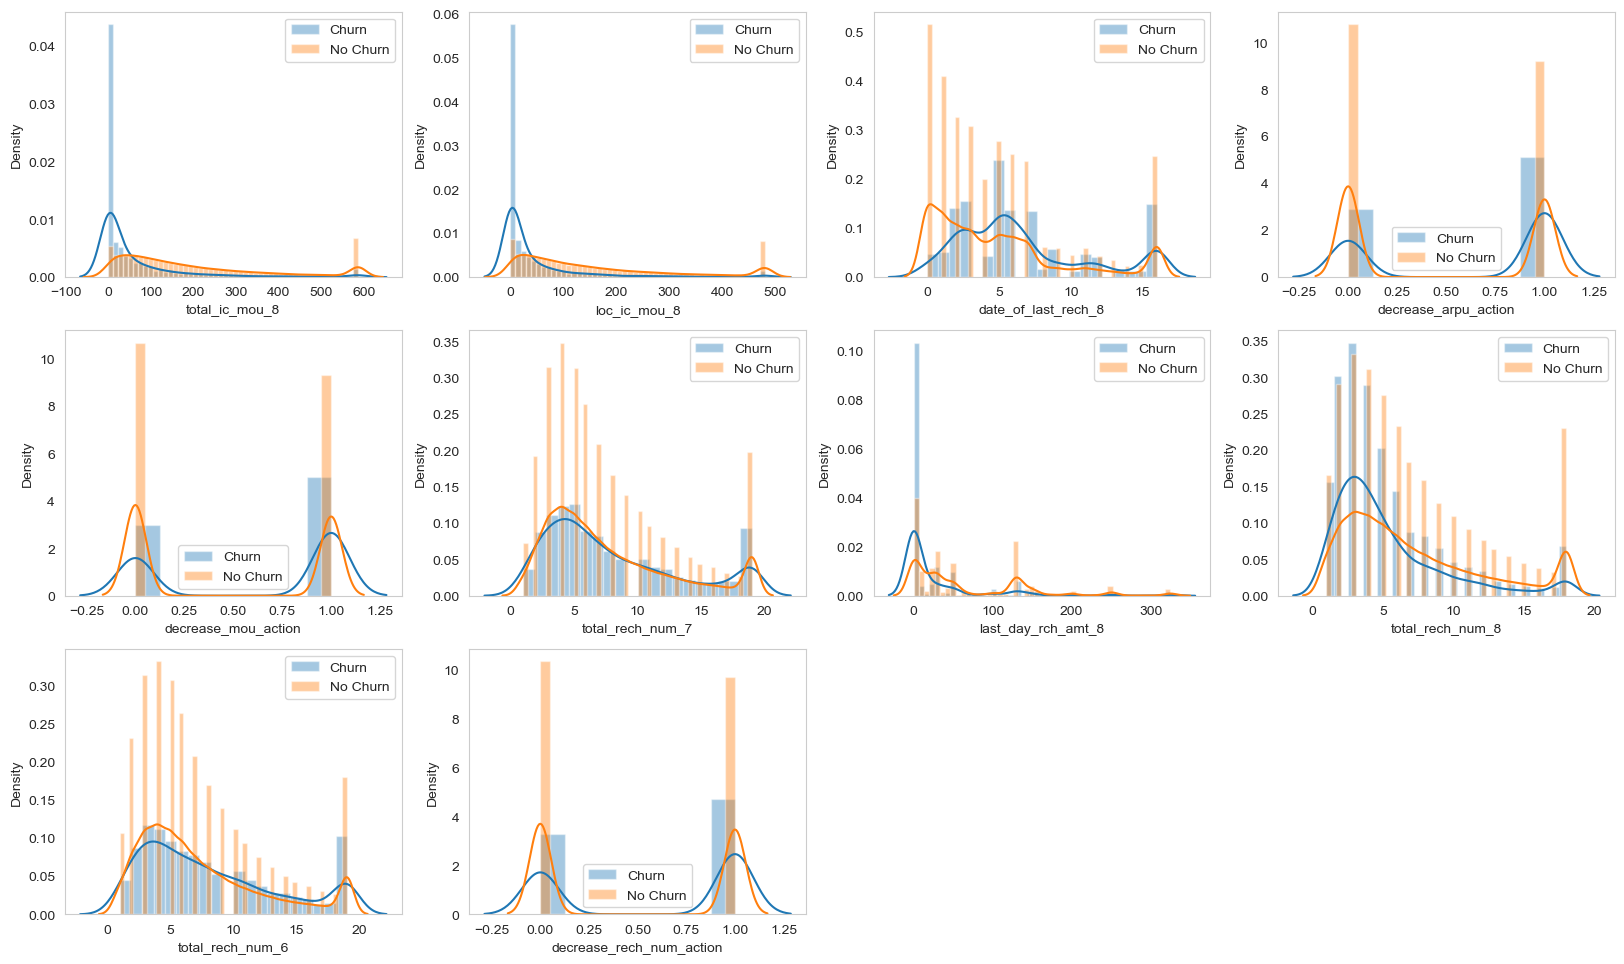

In [124]:
plt.figure(figsize=(20,20))
for i in range(1,11):
    plt.subplot(5,4,i)
    sns.distplot(data[data['churn_probability']==1][feature_imp_10.feature.values[i-1]],label='Churn')
    sns.distplot(data[data['churn_probability']==0][feature_imp_10.feature.values[i-1]],label='No Churn')
    plt.legend()
plt.show()

### 9. Conclusions:

#### Recomendatations:
    